In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

df=pd.read_csv("/content/kc_house_data.csv")
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [46]:
df.isnull().sum().sum()


0

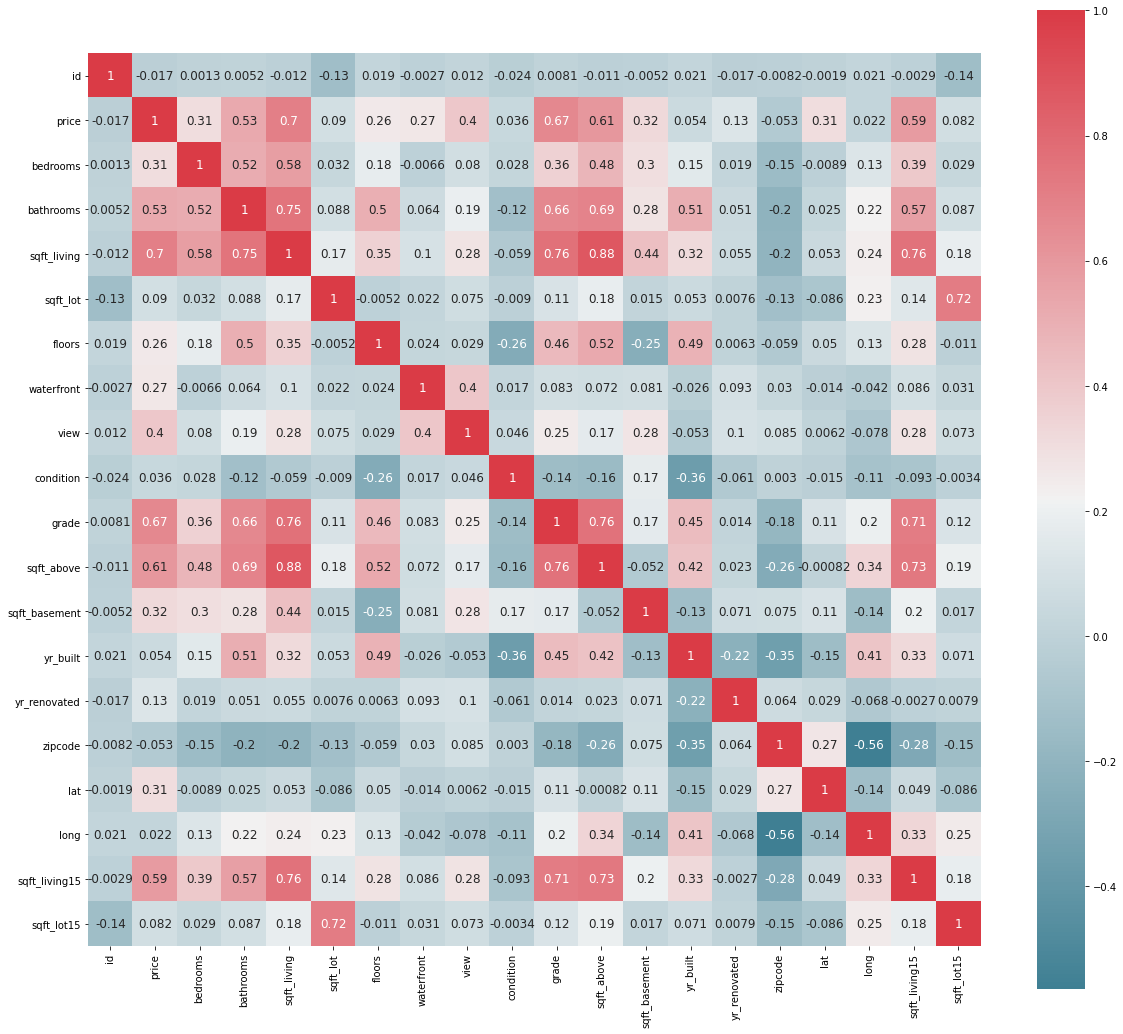

In [47]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

Text(0.5, 0, 'sqft_living')

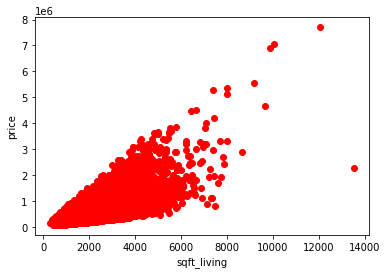

In [48]:
x=df["sqft_living"]
y=df["price"]
plt.scatter(x,y,color="r")
plt.ylabel("price")
plt.xlabel("sqft_living")


Text(0.5, 0, 'sqft_lot')

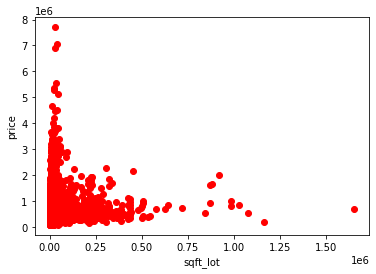

In [49]:
x=df["sqft_lot"]
y=df["price"]
plt.scatter(x,y,color="r")
plt.ylabel("price")
plt.xlabel("sqft_lot")


Text(0.5, 0, 'grade')

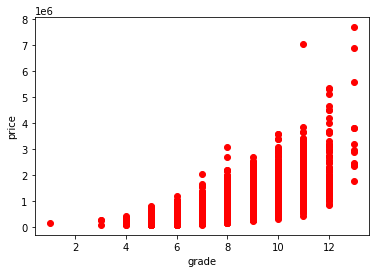

In [50]:
x=df["grade"]
y=df["price"]
plt.scatter(x,y,color="r")
plt.ylabel("price")
plt.xlabel("grade")


Text(0.5, 0, 'sqft_above')

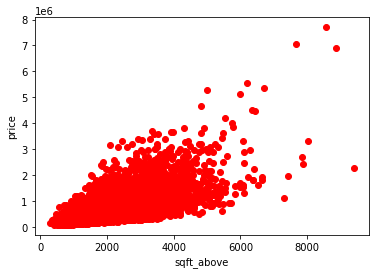

In [51]:
x=df["sqft_above"]
y=df["price"]
plt.scatter(x,y,color="r")
plt.ylabel("price")
plt.xlabel("sqft_above")

Text(0.5, 0, 'sqft_basement')

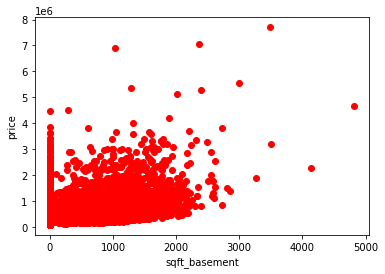

In [52]:
x=df["sqft_basement"]
y=df["price"]
plt.scatter(x,y,color="r")
plt.ylabel("price")
plt.xlabel("sqft_basement")

Text(0.5, 0, 'lat')

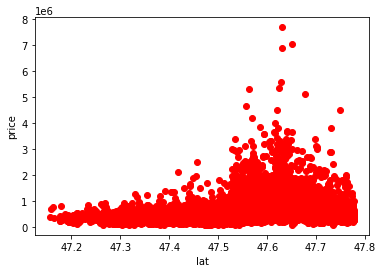

In [53]:
x=df["lat"]
y=df["price"]
plt.scatter(x,y,color="r")
plt.ylabel("price")
plt.xlabel("lat")

Text(0.5, 0, 'long')

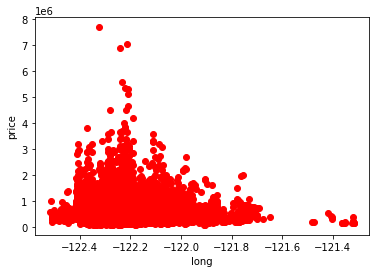

In [54]:
x=df["long"]
y=df["price"]
plt.scatter(x,y,color="r")
plt.ylabel("price")
plt.xlabel("long")

Text(0.5, 0, 'sqft_living15')

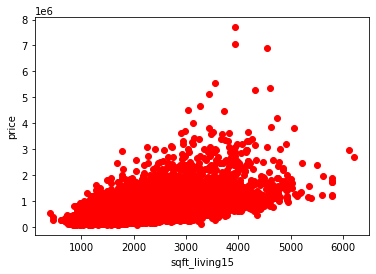

In [55]:
x=df["sqft_living15"]
y=df["price"]
plt.scatter(x,y,color="r")
plt.ylabel("price")
plt.xlabel("sqft_living15")

Text(0.5, 0, 'sqft_lot15')

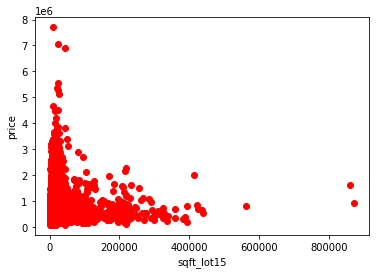

In [56]:
x=df["sqft_lot15"]
y=df["price"]
plt.scatter(x,y,color="r")
plt.ylabel("price")
plt.xlabel("sqft_lot15")

In [57]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


In [58]:
print(model.coef_,model.intercept_)

[284.00261205] -50697.9410763497


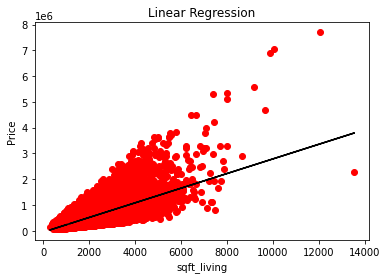

In [59]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

after training the model on the sqft_living feature, we can approximate the value with a MSE of 62902408306

In [60]:
x=df[["sqft_living","grade","bathrooms","sqft_above","sqft_living15"]]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 56262505729.60944
R squared 0.5524688924202645


when adding features to the regression model, the precision increased(MSE got lower and R squared increased)

In [62]:
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 6) 
poly

PolynomialFeatures(degree=6, include_bias=True, interaction_only=False,
                   order='C')

In [78]:
x= df[["sqft_living"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=5)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  58205437465.36677
R squared:  0.5370141525294727


Polynomial regression is more precise than linear regression

In [83]:
x= df[["sqft_living","grade","bathrooms","sqft_above","sqft_living15"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  48445368721.4515
R squared:  0.6146490590871455


Polynomial regression gave better results than linear regression and multipolynomial regression gave better results than multylinear regression